# Analysis and visual inspection of human mobility subflows

In [7]:
import pandas as pd
import numpy as np
import os
import datetime

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def time_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

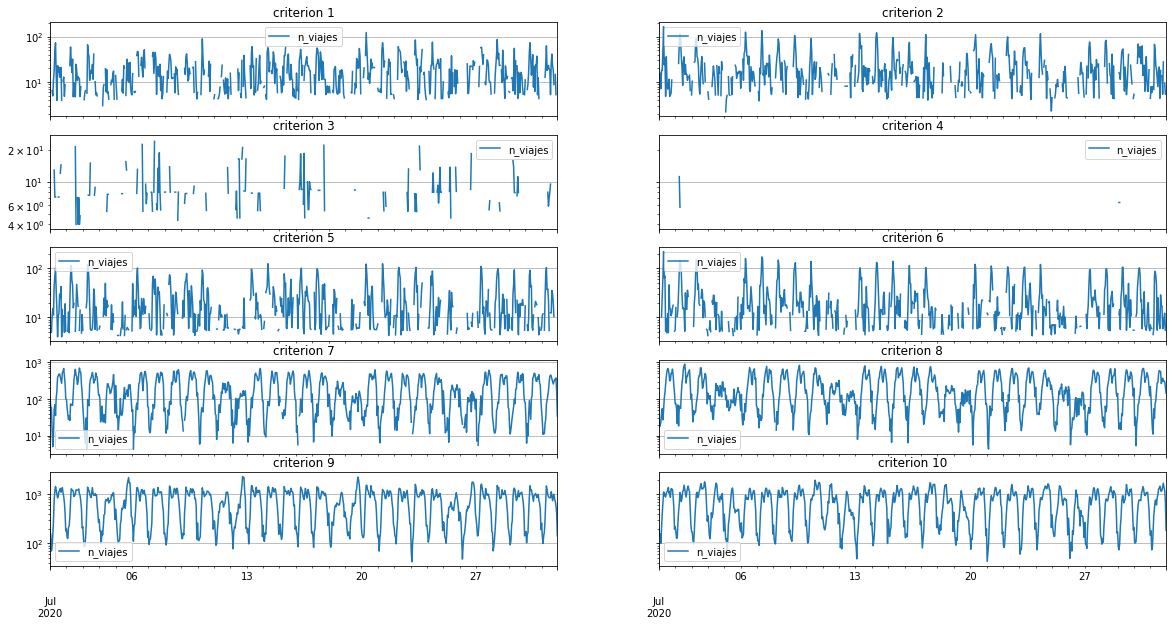

In [9]:
f, axes = plt.subplots(5, 2, figsize=(20,10), sharey='row', sharex='col')
axe = axes.ravel()
subflows= {}
for c in range(1,11):
    flow = pd.read_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_raw.csv'.format(c)), 
                       index_col=0,
                       parse_dates= [0], 
                       date_parser=time_parser)
    subflows[c] = flow
    flow.plot(ax=axe[c-1], label=c, grid=True, logy=True, title='criterion {}'.format(c))

Rate of null points in the target time series

In [10]:
for c in range(1,11):
    df = subflows[c]
    num_nan= df['n_viajes'].isna().sum()
    print('Criterion: {}: # non-null points: {}, # total points: {}, rate: {:.2f}'.format(c, num_nan, len(df), num_nan/len(df)))

Criterion: 1: # non-null points: 185, # total points: 744, rate: 0.25
Criterion: 2: # non-null points: 196, # total points: 744, rate: 0.26
Criterion: 3: # non-null points: 495, # total points: 744, rate: 0.67
Criterion: 4: # non-null points: 718, # total points: 744, rate: 0.97
Criterion: 5: # non-null points: 185, # total points: 744, rate: 0.25
Criterion: 6: # non-null points: 174, # total points: 744, rate: 0.23
Criterion: 7: # non-null points: 7, # total points: 744, rate: 0.01
Criterion: 8: # non-null points: 2, # total points: 744, rate: 0.00
Criterion: 9: # non-null points: 0, # total points: 744, rate: 0.00
Criterion: 10: # non-null points: 0, # total points: 744, rate: 0.00


In [11]:
subflows[c].head()

,n_viajes
2020-07-01 00:00:00,226.881
2020-07-01 01:00:00,142.574
2020-07-01 02:00:00,157.354
2020-07-01 03:00:00,100.096
2020-07-01 04:00:00,209.112


Resample subflows with missing values

In [12]:
subflows_resampled= {}
for c in [6, 7, 8]:
    df = subflows[c]
    df = df.rename(columns={'n_viajes': 'n_viajes_old'})
    df = df.assign(n_viajes=df['n_viajes_old'].interpolate(method='time'))
    subflows_resampled[c] = df
    df.to_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_clean.csv'.format(c)))

Save subflows without missing values

In [13]:
for c in [9,10]:
    subflows[c].to_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_clean.csv'.format(c)))

### Pearson correlation between the three subflows

In [14]:
r, p= pearsonr(subflows_resampled[6]['n_viajes'], subflows_resampled[7]['n_viajes'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: -0.17028559336872093 and p-value: 2.9956324246079757e-06


In [15]:
r, p= pearsonr(subflows_resampled[6]['n_viajes'], subflows_resampled[8]['n_viajes'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: -0.17725111066360655 and p-value: 1.1433490408998661e-06


In [16]:
r, p= pearsonr(subflows_resampled[7]['n_viajes'], subflows_resampled[8]['n_viajes'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.931235162519786 and p-value: 0.0
